<a href="https://colab.research.google.com/github/Ravikiran-Bhonagiri/Feature-Engineering/blob/main/Audio_Features_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_features = pd.read_csv('/content/audio_features.csv')
df_features.drop(columns=['audio_file'], inplace=True)

feature_columns = ['zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean',
       'spectral_bandwidth_mean', 'rms_mean', 'mfcc_1_mean', 'mfcc_2_mean',
       'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean',
       'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_mean',
       'spectral_contrast_mean', 'tonnetz_mean', 'onset_strength_mean',
       'harmonic_rms', 'percussive_rms', 'mean_pitch', 'tempo',
       'chroma_cqt_mean', 'spectral_flatness_mean', 'spectral_entropy',
       'crest_factor', 'attack_time', 'decay_time', 'skewness', 'kurtosis']

labels = df_features['audio_label'].to_list()


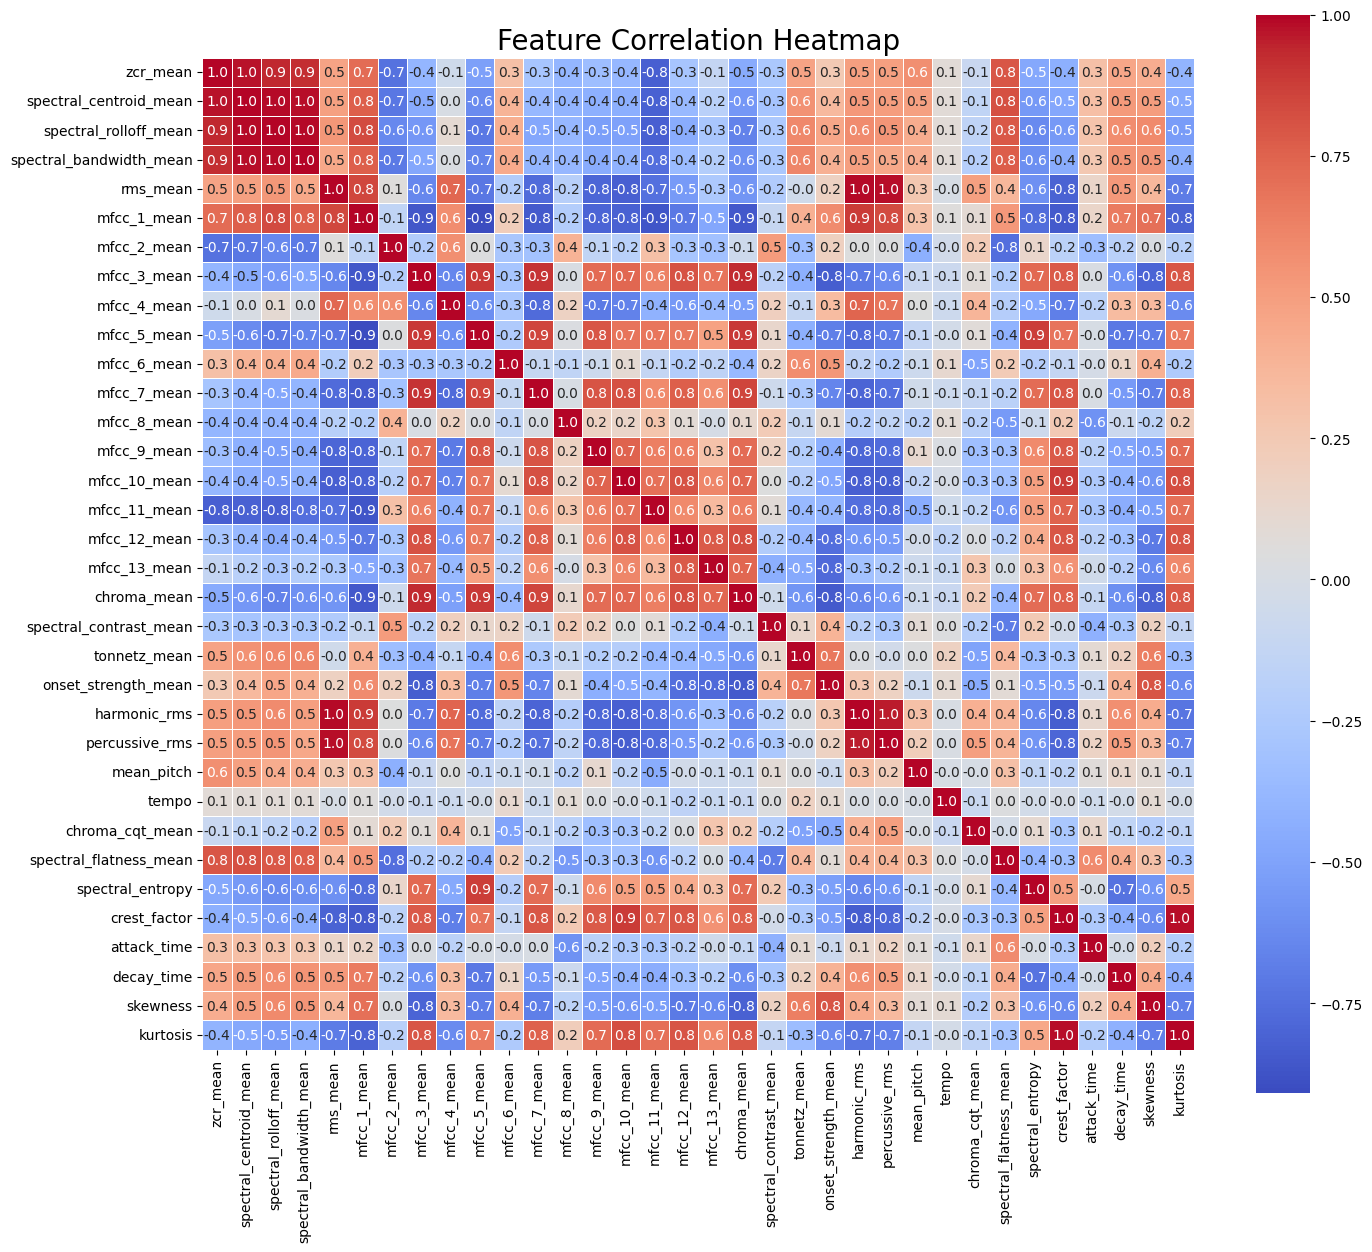

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 14))  # Increased the figure size
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', square=True, linewidths=0.5)
    plt.title("Feature Correlation Heatmap", fontsize=20)
    plt.show()

# Plot the updated correlation heatmap
plot_correlation_heatmap(df_features[feature_columns])



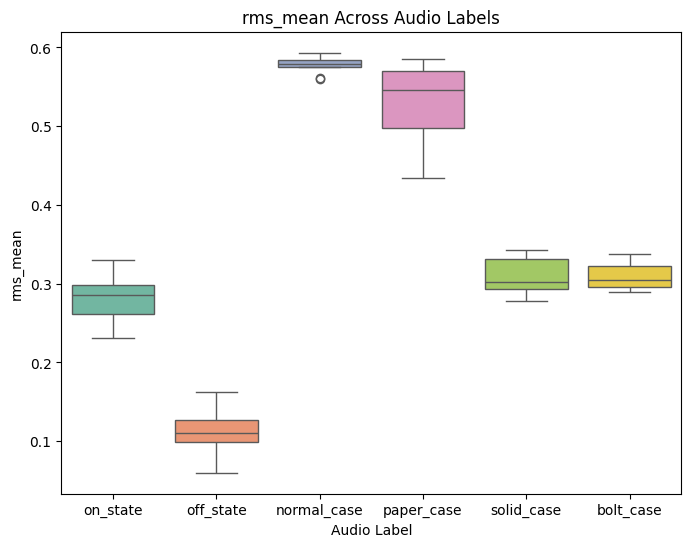

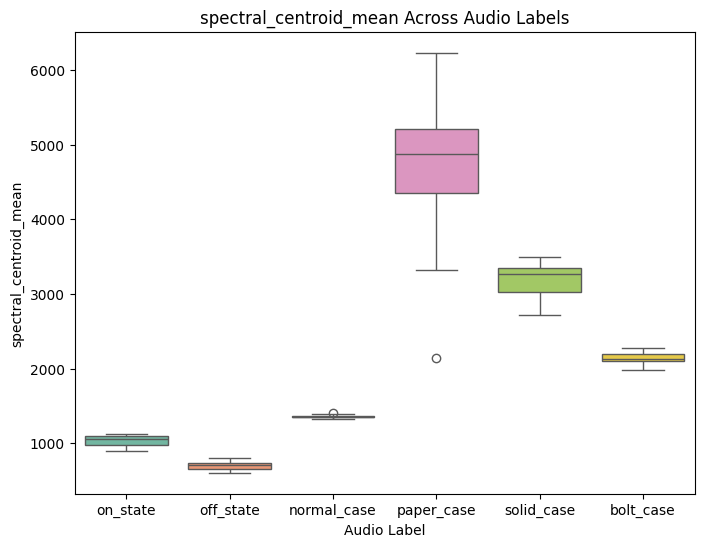

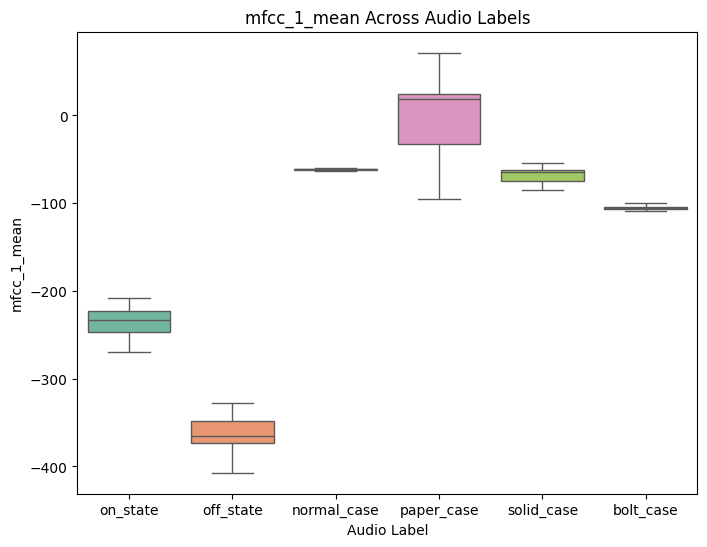

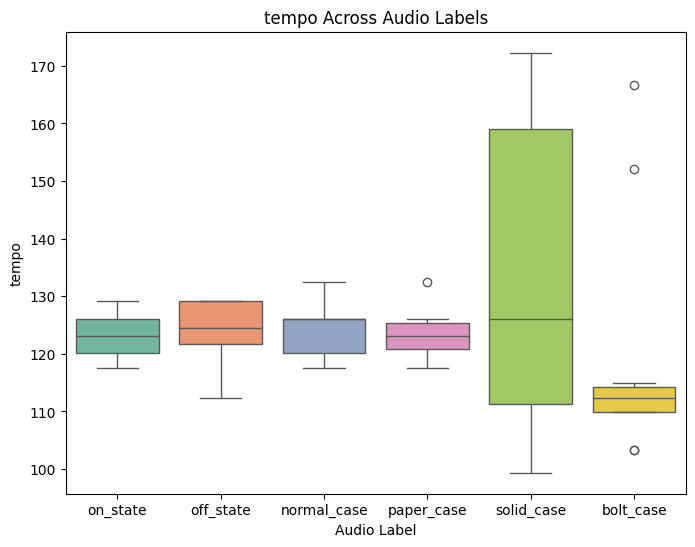

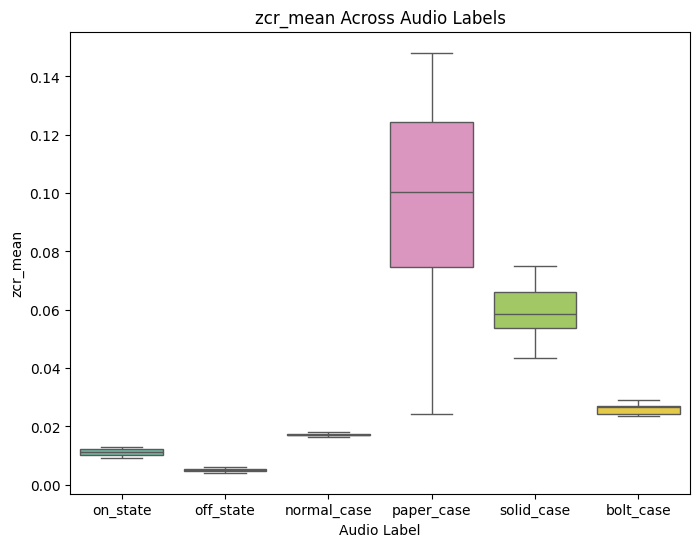

In [4]:
def plot_feature_by_label(df, feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='audio_label', y=feature, palette='Set2')
    plt.title(f'{feature} Across Audio Labels')
    plt.xlabel('Audio Label')
    plt.ylabel(feature)
    plt.show()

# Plot boxplots for selected features across different audio labels
features_to_plot_by_label = ['rms_mean', 'spectral_centroid_mean', 'mfcc_1_mean', 'tempo', 'zcr_mean']
for feature in features_to_plot_by_label:
    plot_feature_by_label(df_features, feature)


<Figure size 1000x800 with 0 Axes>

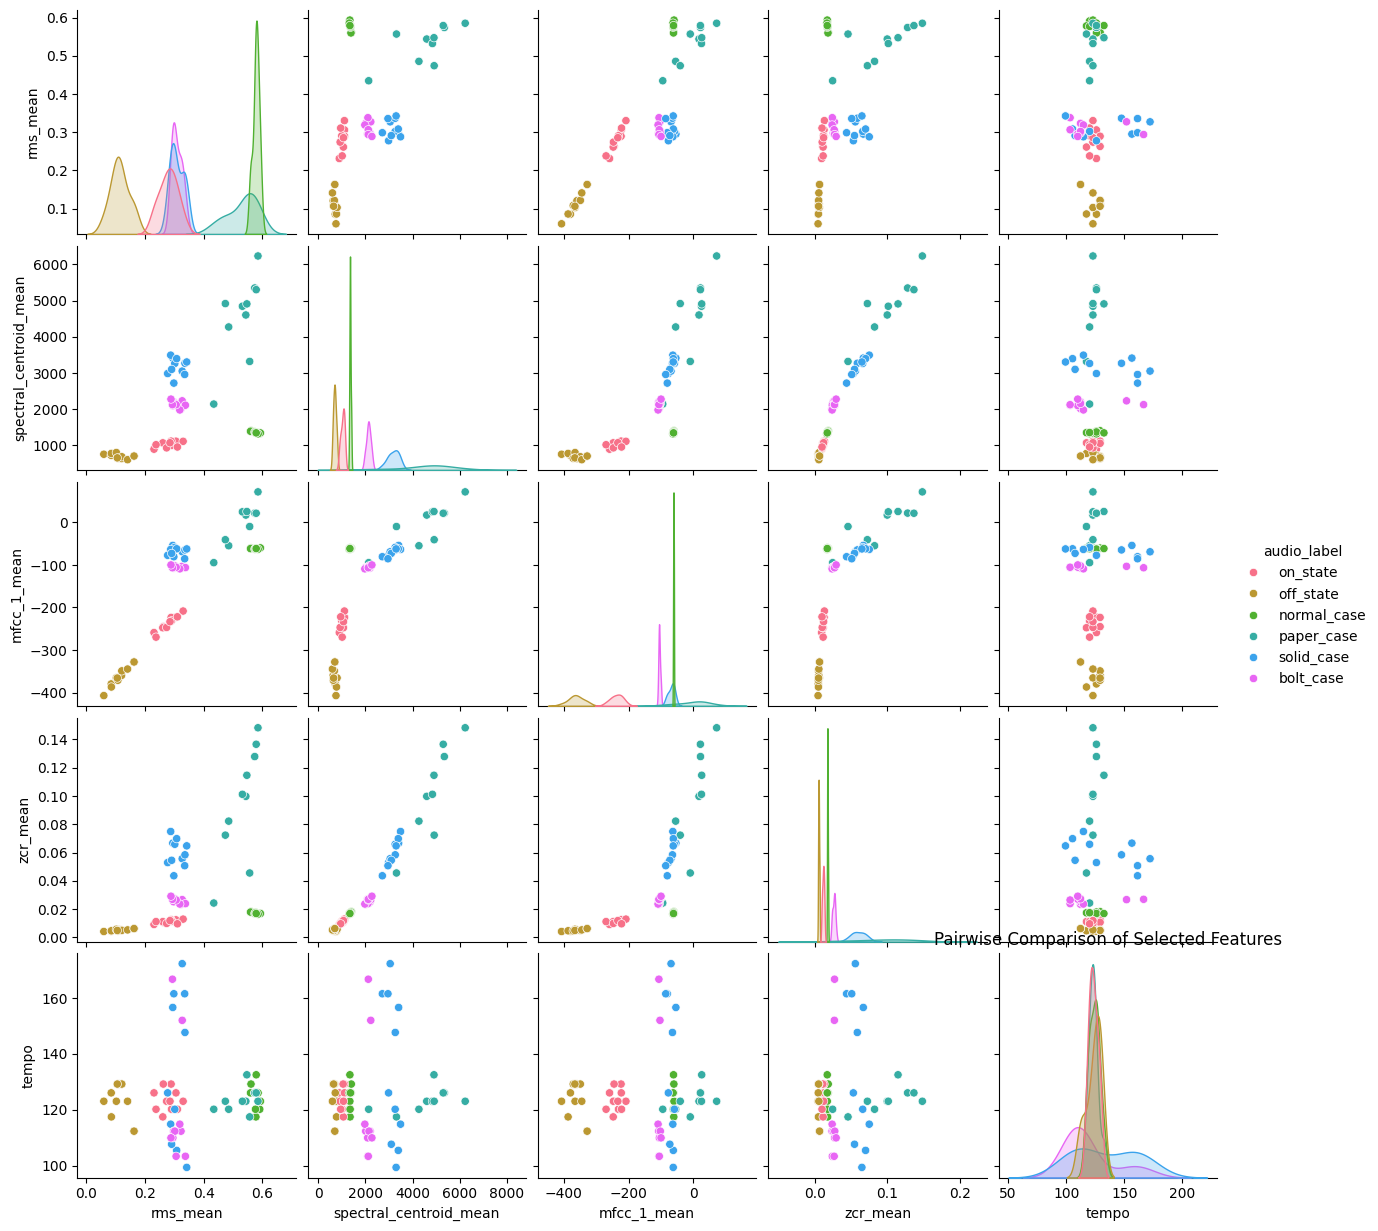

In [5]:
def plot_pairplot(df, selected_features):
    plt.figure(figsize=(10, 8))
    sns.pairplot(df[selected_features + ['audio_label']], hue='audio_label', palette='husl')
    plt.title("Pairwise Comparison of Selected Features")
    plt.show()

# Selected features for pairplot
selected_features = ['rms_mean', 'spectral_centroid_mean', 'mfcc_1_mean', 'zcr_mean', 'tempo']
plot_pairplot(df_features, selected_features)


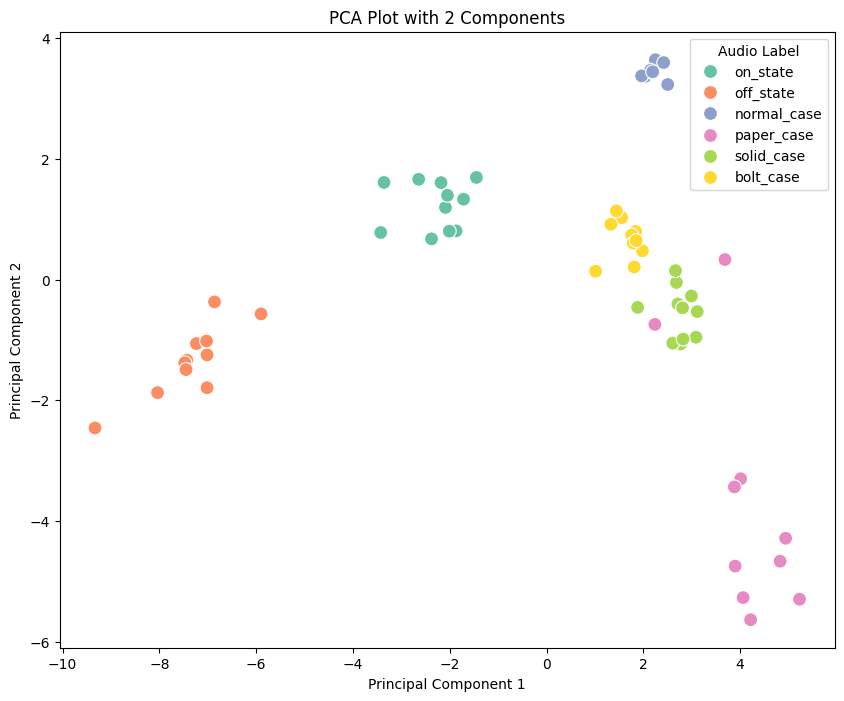

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fill missing values, perform PCA, and plot
def fill_missing_and_plot_pca(df, feature='mean_pitch', n_components=2):
    """
    Fill missing values for the given feature with the mean of the corresponding label group,
    perform PCA, and plot.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA components.
    """
    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA
    df_pca = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_pca.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and plot
fill_missing_and_plot_pca(df_features, feature='mean_pitch', n_components=2)


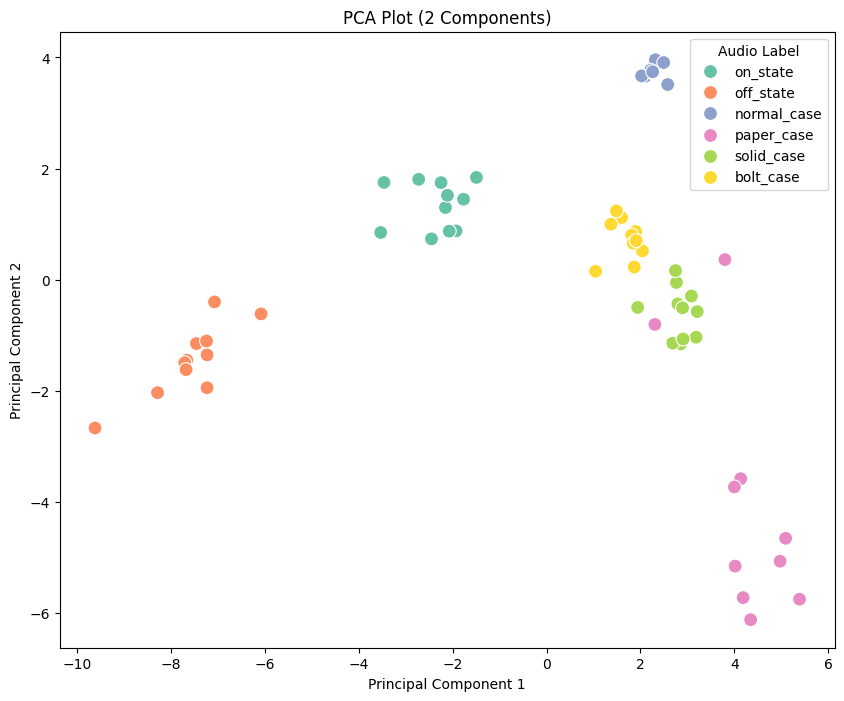

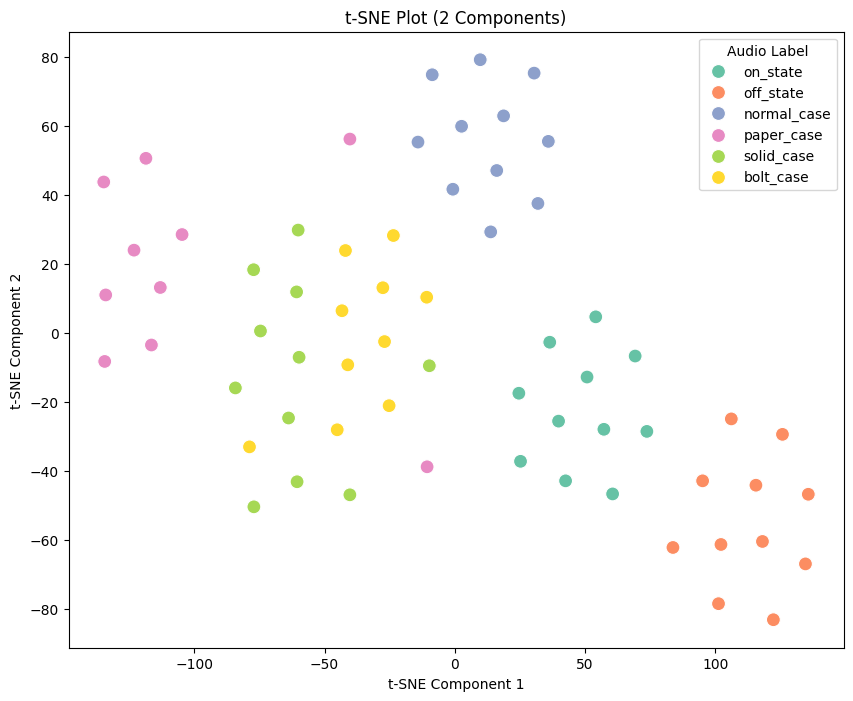

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

def perform_pca_tsne(df, feature='mean_pitch', n_components=2, perplexity=30, learning_rate=200):
    """
    Fill missing values, perform PCA and t-SNE, and plot both.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA/t-SNE components.
        perplexity (int): Perplexity parameter for t-SNE.
        learning_rate (float): Learning rate for t-SNE.
    """
    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA and t-SNE
    df_data = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_data.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA for comparison
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Perform t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    tsne_features = tsne.fit_transform(normalized_data)
    df['tsne_1'] = tsne_features[:, 0]
    df['tsne_2'] = tsne_features[:, 1]

    # Plot PCA
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title('PCA Plot (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

    # Plot t-SNE
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='tsne_1', y='tsne_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title('t-SNE Plot (2 Components)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and t-SNE
perform_pca_tsne(df_features, feature='mean_pitch', n_components=2, perplexity=30, learning_rate=200)


In [8]:
def get_feature_importance_by_variance(df, n_components=2, top_n=10):
    """
    Compute feature importance based on variance explained by PCA components.

    Parameters:
        df (DataFrame): The input dataframe.
        n_components (int): Number of PCA components.
        top_n (int): Number of top features to return.

    Returns:
        DataFrame: DataFrame of features and their importance based on variance contribution.
    """
    # Drop non-numeric and derived columns (audio_file, audio_label, PCA, t-SNE, cluster)
    columns_to_exclude = ['audio_file', 'audio_label'] + [col for col in df.columns if 'pca_' in col or 'tsne_' in col or 'cluster' in col]
    df_numeric = df.drop(columns=columns_to_exclude, errors='ignore')

    # Normalize the features
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_numeric)

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(normalized_data)

    # Get explained variance ratios
    explained_variance_ratios = pca.explained_variance_ratio_

    print("Explained Variance Ratios:")
    for i, ratio in enumerate(explained_variance_ratios):
        print(f"PC{i+1}: {ratio:.4f}")

    # Create a DataFrame for feature contributions
    feature_contributions = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=df_numeric.columns
    )

    # Multiply the PCA loadings by the explained variance ratio for each PC
    for i in range(n_components):
        feature_contributions[f'Weighted_PC{i+1}'] = feature_contributions[f'PC{i+1}'].abs() * explained_variance_ratios[i]

    # Sum the weighted contributions across all PCs to get the total importance
    feature_contributions['Total_Importance'] = feature_contributions[[f'Weighted_PC{i+1}' for i in range(n_components)]].sum(axis=1)

    # Normalize the importance values so that they sum to 1
    feature_contributions['Normalized_Importance'] = feature_contributions['Total_Importance'] / feature_contributions['Total_Importance'].sum()

    # Sort features by normalized importance and return top N
    top_features = feature_contributions.sort_values(by='Normalized_Importance', ascending=False).head(top_n)

    print(f"Top {top_n} Features Based on Variance Contribution:")
    print(top_features[['Total_Importance', 'Normalized_Importance']])
    return top_features[['Total_Importance', 'Normalized_Importance']]

# Get the top features based on variance contribution
top_features_by_variance = get_feature_importance_by_variance(df_features, n_components=2, top_n=20)


Explained Variance Ratios:
PC1: 0.4689
PC2: 0.1617
Top 20 Features Based on Variance Contribution:
                         Total_Importance  Normalized_Importance
spectral_rolloff_mean            0.133767               0.040946
spectral_centroid_mean           0.131656               0.040300
spectral_bandwidth_mean          0.129800               0.039732
mfcc_7_mean                      0.128632               0.039374
zcr_mean                         0.125227               0.038332
mfcc_3_mean                      0.124882               0.038227
crest_factor                     0.120039               0.036744
mfcc_10_mean                     0.118803               0.036366
mfcc_1_mean                      0.117631               0.036007
kurtosis                         0.116475               0.035653
chroma_mean                      0.115673               0.035408
mfcc_4_mean                      0.115027               0.035210
mfcc_12_mean                     0.114718               

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import shap
import matplotlib.pyplot as plt

def feature_selection_methods(df, target_col='audio_label', top_n=10, n_components=2):
    """
    Perform various feature selection methods for classification, excluding derived features.

    Parameters:
        df (DataFrame): The input dataframe.
        target_col (str): The target column for classification.
        top_n (int): Number of top features to return for each method.
        n_components (int): Number of PCA components.

    Returns:
        dict: A dictionary containing top features from each method.
    """
    # Fill missing values in "mean_pitch"
    df["mean_pitch"] = df.groupby(target_col)["mean_pitch"].transform(lambda x: x.fillna(x.mean()))

    # Drop derived columns (like 'pca_', 'tsne_', and non-numeric features)
    columns_to_exclude = [col for col in df.columns if 'pca_' in col or 'tsne_' in col or 'cluster' in col]
    X = df.drop(columns=[target_col, 'audio_file'] + columns_to_exclude, errors='ignore')
    y = df[target_col]

    feature_results = {}

    # 1. Mutual Information
    mi_scores = mutual_info_classif(X, y)
    mi_df = pd.DataFrame({"Feature": X.columns, "Mutual_Info": mi_scores})
    feature_results['Mutual Information'] = mi_df.sort_values(by="Mutual_Info", ascending=False).head(top_n)

    # 2. ANOVA F-Test
    f_selector = SelectKBest(score_func=f_classif, k=top_n)
    f_selector.fit(X, y)
    f_scores = pd.DataFrame({"Feature": X.columns, "F_Score": f_selector.scores_})
    feature_results['ANOVA F-Test'] = f_scores.sort_values(by="F_Score", ascending=False).head(top_n)

    # 3. Recursive Feature Elimination (RFE)
    rf_model = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=rf_model, n_features_to_select=top_n)
    rfe.fit(X, y)
    rfe_features = pd.DataFrame({"Feature": X.columns, "Selected": rfe.support_})
    feature_results['RFE'] = rfe_features[rfe_features["Selected"] == True]

    # 4. Random Forest Feature Importance
    rf_model.fit(X, y)
    rf_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
    feature_results['Random Forest'] = rf_importances.sort_values(by="Importance", ascending=False).head(top_n)

    # 5. Lasso (L1-Regularization)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso.fit(X_scaled, y)
    lasso_weights = pd.DataFrame({"Feature": X.columns, "Weight": lasso.coef_[0]})
    feature_results['Lasso (L1-Regularization)'] = lasso_weights.sort_values(by="Weight", ascending=False).head(top_n)

    # 6. PCA Feature Contribution
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)
    pca_contributions = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=X.columns
    )
    pca_contributions['Total_Contribution'] = pca_contributions.abs().sum(axis=1)
    feature_results['PCA Contribution'] = pca_contributions.sort_values(by='Total_Contribution', ascending=False).head(top_n)

    # Return the feature importance results
    return feature_results

# Example Usage:
top_features = feature_selection_methods(df_features, target_col='audio_label', top_n=20, n_components=2)

# Display the results
for method, features in top_features.items():
    print(f"\nTop Features from {method}:")
    print(features)



Top Features from Mutual Information:
                    Feature  Mutual_Info
2     spectral_rolloff_mean     1.724744
1    spectral_centroid_mean     1.691354
0                  zcr_mean     1.655011
27   spectral_flatness_mean     1.564929
5               mfcc_1_mean     1.558269
3   spectral_bandwidth_mean     1.456092
21      onset_strength_mean     1.452941
23           percussive_rms     1.390663
6               mfcc_2_mean     1.381217
22             harmonic_rms     1.377760
7               mfcc_3_mean     1.300463
33                 kurtosis     1.276454
8               mfcc_4_mean     1.197772
11              mfcc_7_mean     1.144427
14             mfcc_10_mean     1.140869
4                  rms_mean     1.126384
29             crest_factor     1.109260
9               mfcc_5_mean     1.061761
18              chroma_mean     1.045643
15             mfcc_11_mean     0.989231

Top Features from ANOVA F-Test:
                    Feature     F_Score
21      onset_strength_mean

In [17]:
df_features.columns

Index(['zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean',
       'spectral_bandwidth_mean', 'rms_mean', 'mfcc_1_mean', 'mfcc_2_mean',
       'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean',
       'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_mean',
       'spectral_contrast_mean', 'tonnetz_mean', 'onset_strength_mean',
       'harmonic_rms', 'percussive_rms', 'mean_pitch', 'tempo',
       'chroma_cqt_mean', 'spectral_flatness_mean', 'spectral_entropy',
       'crest_factor', 'attack_time', 'decay_time', 'skewness', 'kurtosis',
       'audio_label', 'pca_1', 'pca_2', 'tsne_1', 'tsne_2'],
      dtype='object')

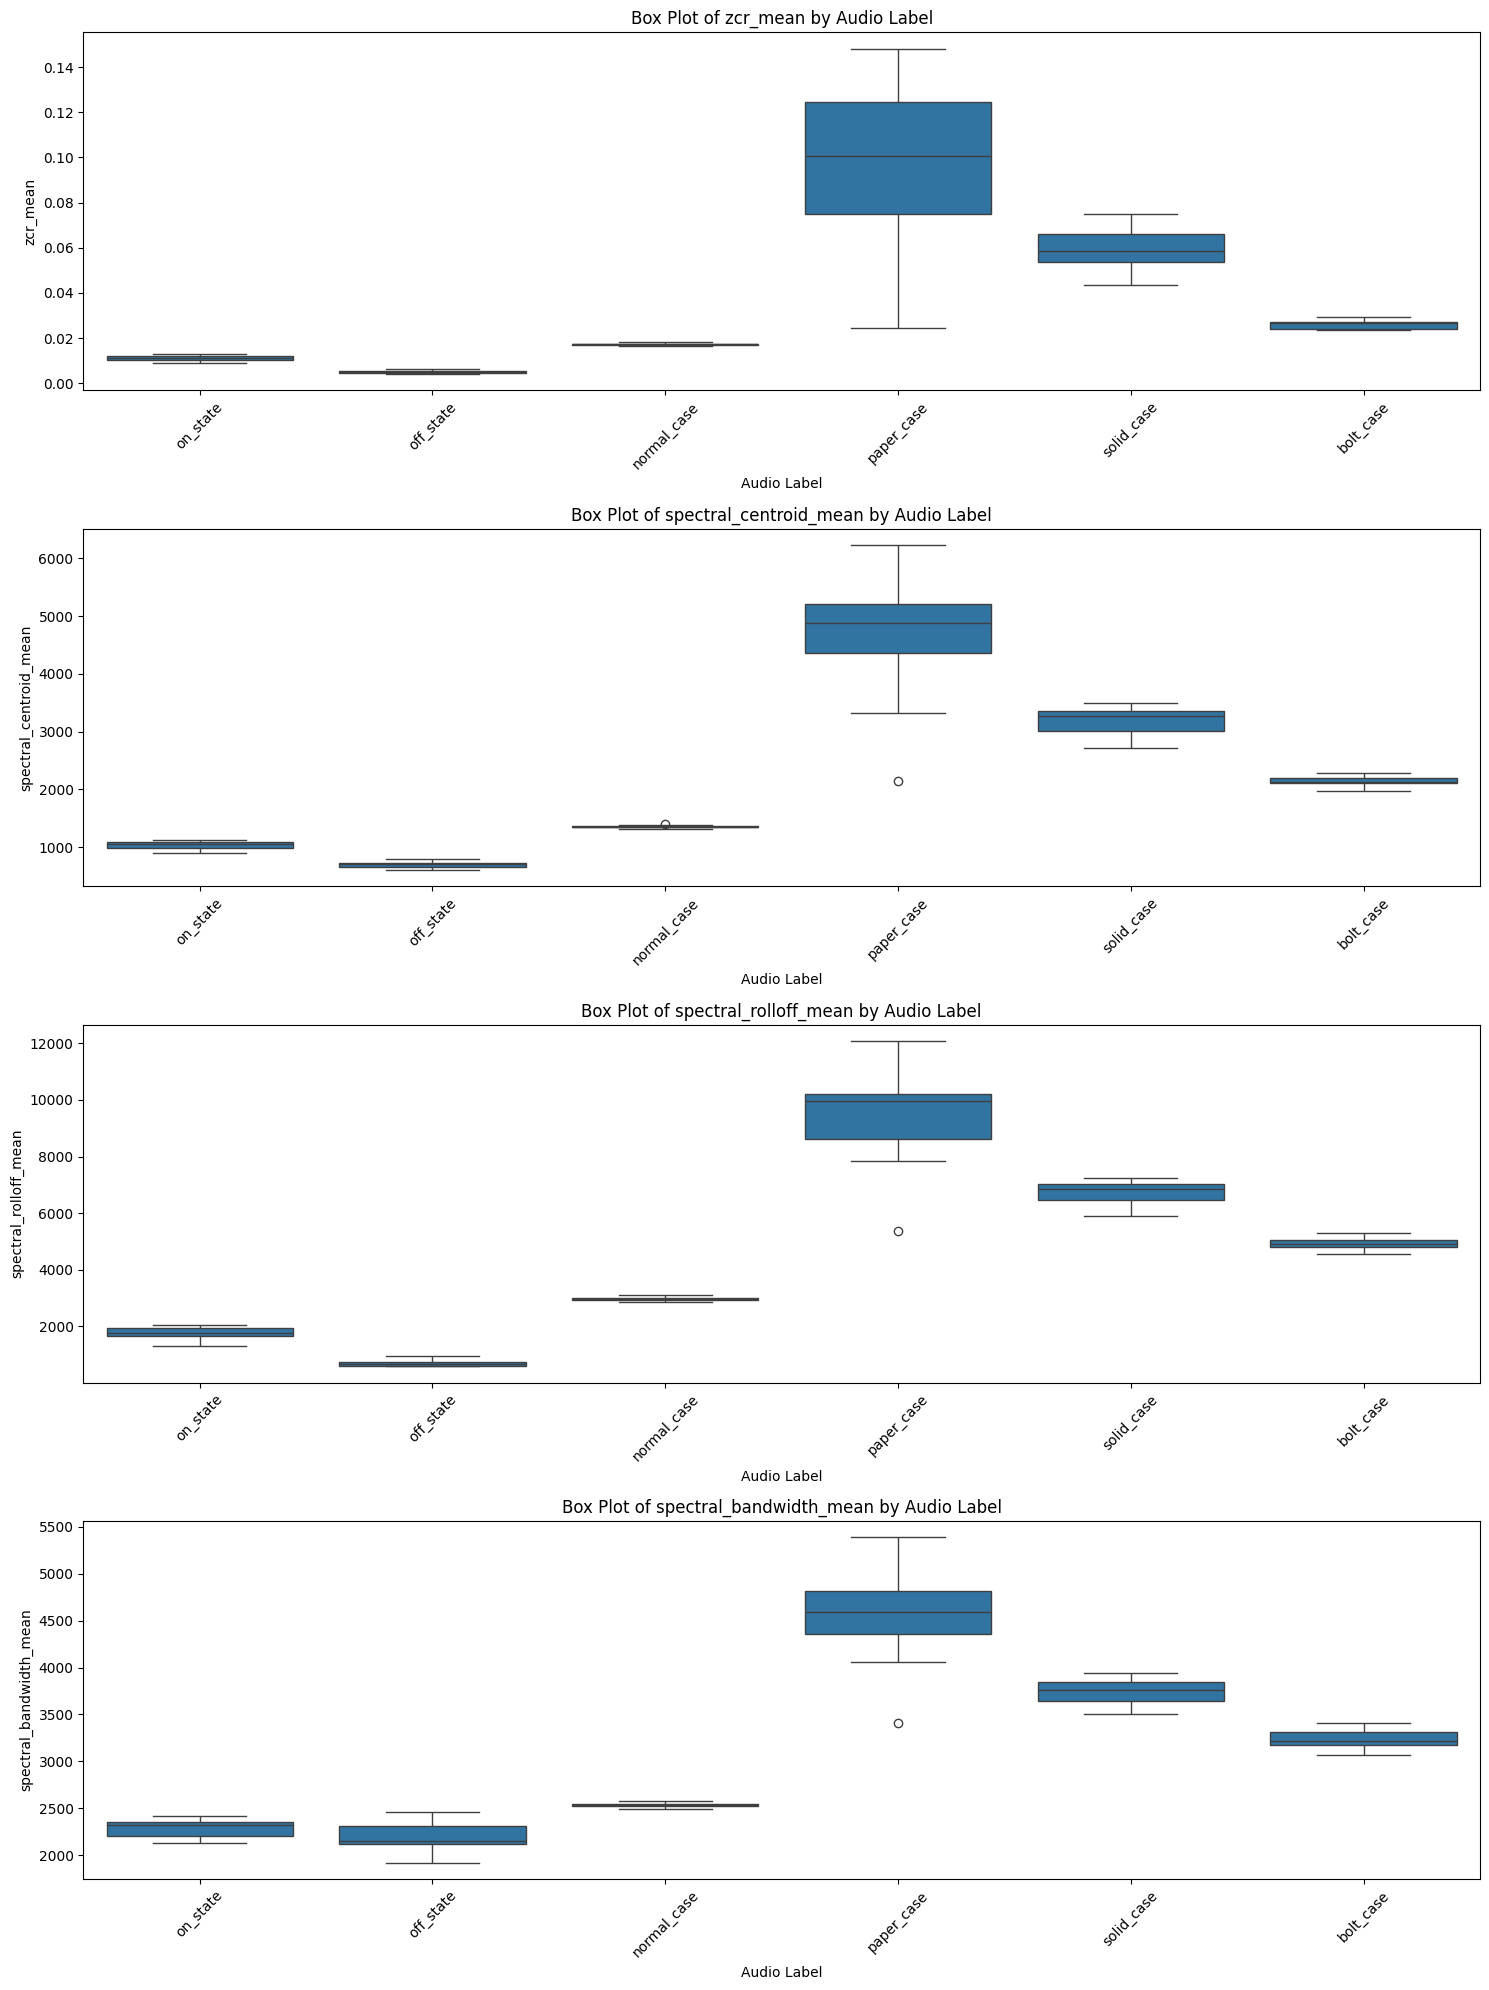

In [20]:
# Selected important features based on sound anomaly analysis context
selected_features = [
    'zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean'
]

# Ensure only features that exist in the dataframe are selected
selected_features = [feature for feature in selected_features if feature in df_features.columns]

# Creating box plots for the selected features grouped by 'audio_label'
plt.figure(figsize=(15, len(selected_features) * 5))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    sns.boxplot(x="audio_label", y=feature, data=df_features)
    plt.title(f"Box Plot of {feature} by Audio Label")
    plt.xlabel("Audio Label")
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

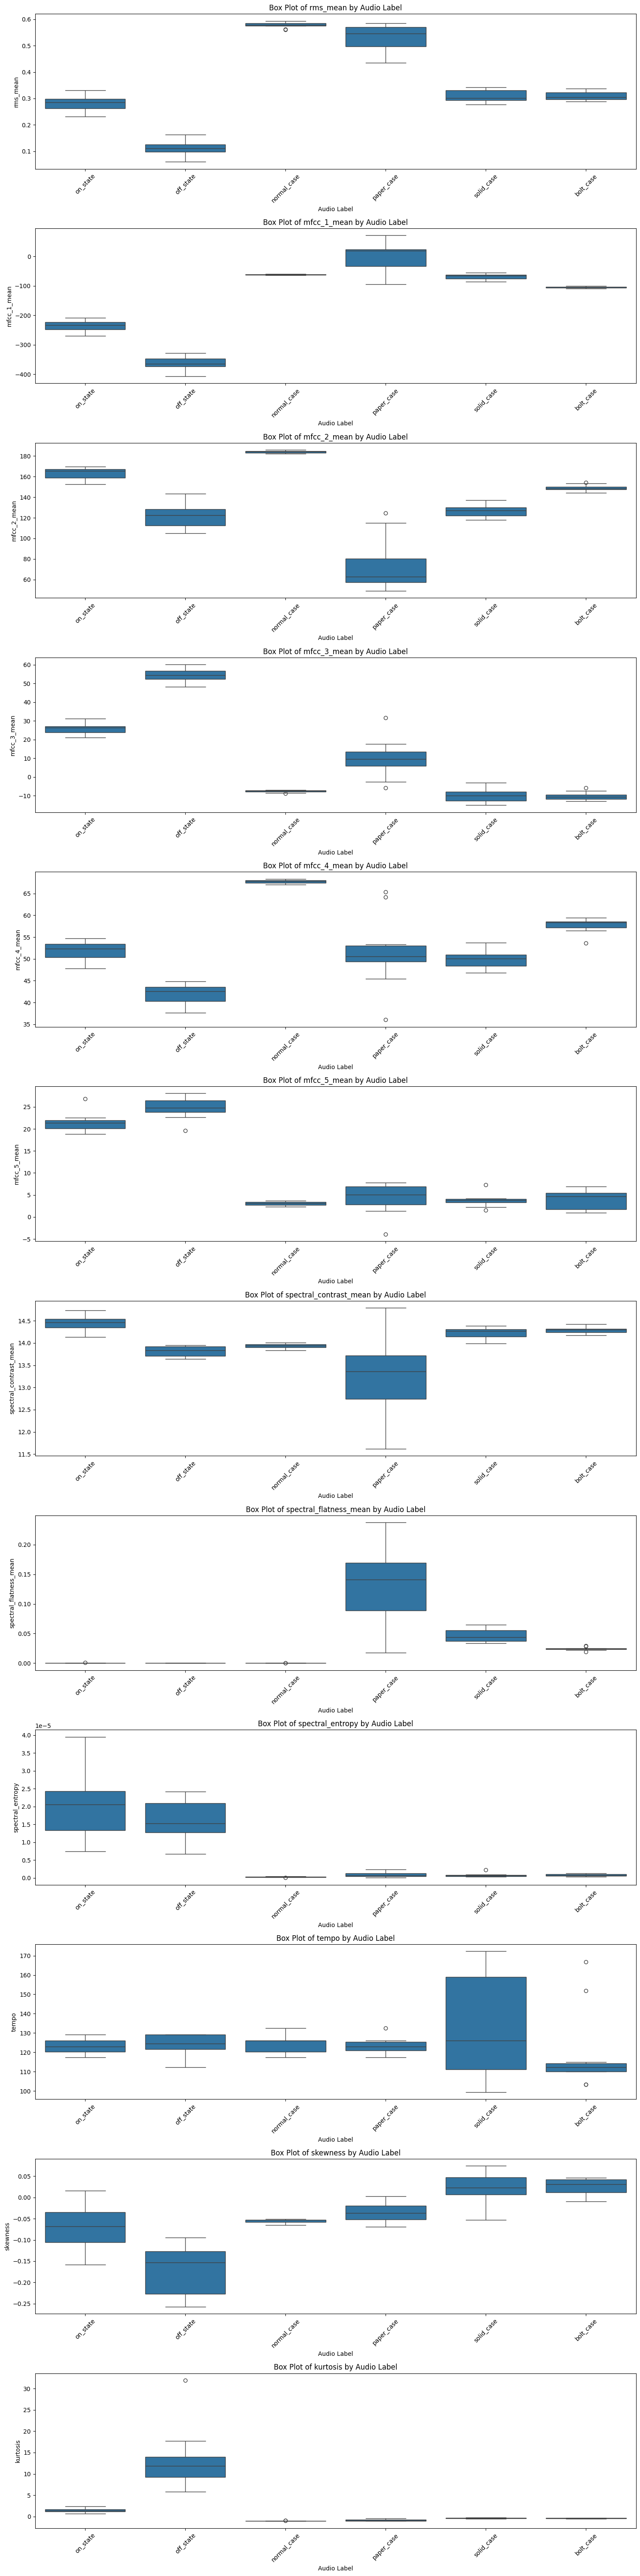

In [21]:
# Selected important features based on sound anomaly analysis context
selected_features = [
    'rms_mean', 'mfcc_1_mean', 'mfcc_2_mean',
    'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'spectral_contrast_mean',
    'spectral_flatness_mean', 'spectral_entropy', 'tempo', 'skewness', 'kurtosis'
]

# Ensure only features that exist in the dataframe are selected
selected_features = [feature for feature in selected_features if feature in df_features.columns]

# Creating box plots for the selected features grouped by 'audio_label'
plt.figure(figsize=(15, len(selected_features) * 5))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    sns.boxplot(x="audio_label", y=feature, data=df_features)
    plt.title(f"Box Plot of {feature} by Audio Label")
    plt.xlabel("Audio Label")
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Important Audio Features for Sound Anomaly Detection

### 1. **Zero Crossing Rate (zcr_mean)**
   - **Definition**: Zero Crossing Rate (ZCR) measures how often the audio signal changes from positive to negative or vice versa.
   - **Significance**: This feature helps differentiate between noise-like signals and more tonal sounds. Sudden increases in ZCR can indicate noise bursts or abnormalities in machine operation.

### 2. **Spectral Centroid (spectral_centroid_mean)**
   - **Definition**: The spectral centroid represents the "center of mass" of the spectrum, indicating where the average frequency lies.
   - **Significance**: It correlates with the perceived brightness of the sound. Changes in the spectral centroid may indicate unusual shifts in frequency distribution.

### 3. **Spectral Rolloff (spectral_rolloff_mean)**
   - **Definition**: The spectral rolloff is the frequency below which a specified percentage (usually 85%) of the total spectral energy resides.
   - **Significance**: A lower rolloff suggests more low-frequency energy, while a higher rolloff suggests more high-frequency content. Abnormal shifts can indicate operational issues.

### 4. **Spectral Bandwidth (spectral_bandwidth_mean)**
   - **Definition**: Spectral bandwidth measures the spread of frequencies around the spectral centroid.
   - **Significance**: It indicates whether the sound is concentrated around certain frequencies (narrowband) or spread across a wide range (broadband). High bandwidth can indicate abnormal noise.

### 5. **Root Mean Square Energy (rms_mean)**
   - **Definition**: RMS energy represents the average power of the audio signal.
   - **Significance**: It helps detect changes in loudness or energy, which are common indicators of anomalies in machine sounds.

### 6. **Mel-Frequency Cepstral Coefficients (MFCCs)**
   - **Definition**: MFCCs capture the spectral shape of the audio signal by modeling how humans perceive sound.
   - **Significance**: The first few MFCCs (e.g., `mfcc_1_mean`, `mfcc_2_mean`) capture the broad spectral features, while later coefficients capture finer details. Variations in these coefficients can highlight subtle sound changes.

### 7. **Spectral Contrast (spectral_contrast_mean)**
   - **Definition**: Spectral contrast measures the difference in amplitude between spectral peaks and valleys.
   - **Significance**: Higher contrast indicates clearer harmonic content, while lower contrast may suggest noise or uniform sound.

### 8. **Spectral Flatness (spectral_flatness_mean)**
   - **Definition**: Spectral flatness quantifies how noise-like a sound is by comparing geometric to arithmetic mean of the power spectrum.
   - **Significance**: A high flatness value suggests white noise, while low flatness indicates a more tonal sound.

### 9. **Spectral Entropy (spectral_entropy)**
   - **Definition**: Spectral entropy measures the randomness of the spectral distribution.
   - **Significance**: Higher entropy indicates a more uniform distribution (like noise), while lower entropy suggests concentrated energy in specific frequencies.

### 10. **Tempo (tempo)**
   - **Definition**: Tempo represents the estimated beats per minute (BPM) of the audio signal.
   - **Significance**: Irregularities or abrupt changes in the tempo feature can suggest disruptions in periodic sound patterns.

### 11. **Skewness (skewness)**
   - **Definition**: Skewness measures the asymmetry of the amplitude distribution of the audio signal.
   - **Significance**: Positive skewness indicates a longer tail in the positive amplitude direction, while negative skewness suggests more negative peaks.

### 12. **Kurtosis (kurtosis)**
   - **Definition**: Kurtosis measures the "peakedness" of the signal distribution.
   - **Significance**: High kurtosis indicates more prominent peaks, while low kurtosis indicates a flatter distribution. Sudden peaks can correspond to abnormal sounds.


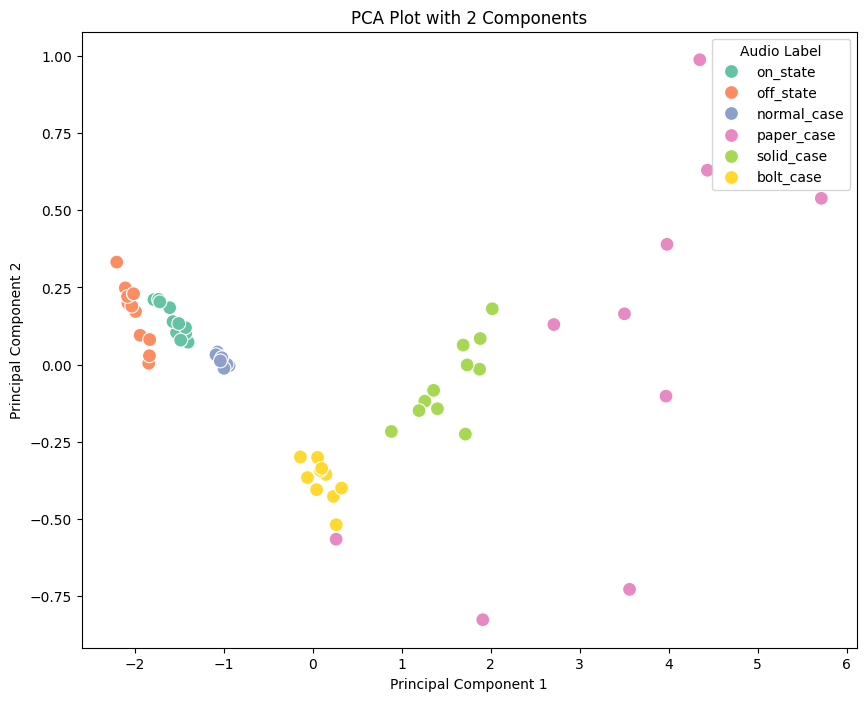

In [25]:
def fill_missing_and_plot_pca(df, n_components=2):
    """
    Fill missing values for the given feature with the mean of the corresponding label group,
    perform PCA, and plot.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA components.
    """

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()


selected_features = [
    'zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 'audio_label',
]

fill_missing_and_plot_pca(df_features[selected_features], n_components=2)

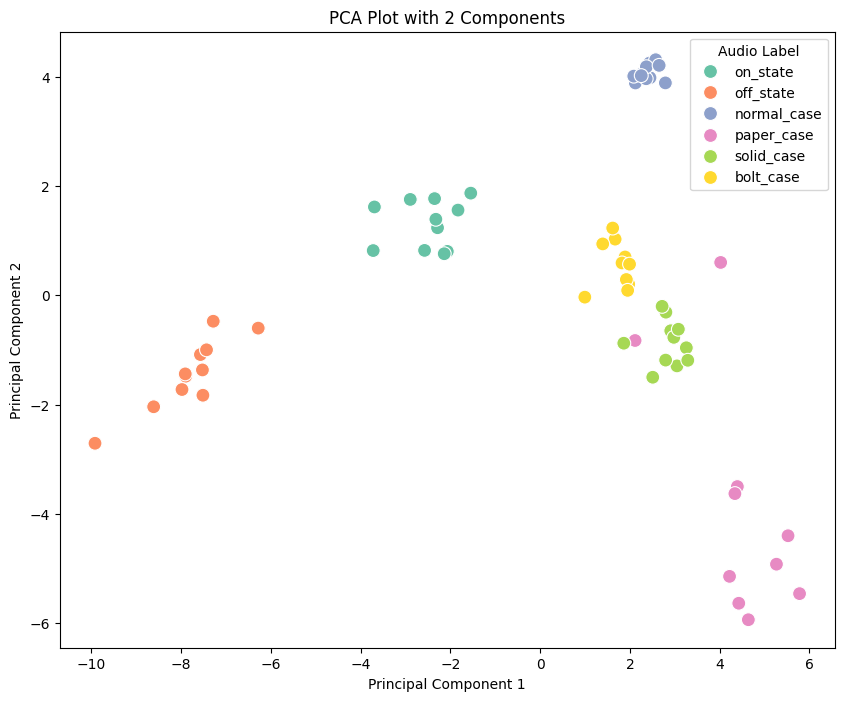

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fill missing values, perform PCA, and plot
def fill_missing_and_plot_pca(df, feature='mean_pitch', n_components=2):
    """
    Fill missing values for the given feature with the mean of the corresponding label group,
    perform PCA, and plot.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA components.
    """
    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA
    df_pca = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_pca.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and plot
fill_missing_and_plot_pca(df_features, feature='mean_pitch', n_components=2)


Index(['mfcc_2_mean', 'spectral_centroid_mean', 'harmonic_rms', 'mfcc_1_mean',
       'spectral_rolloff_mean', 'zcr_mean', 'percussive_rms', 'mfcc_7_mean',
       'spectral_flatness_mean', 'onset_strength_mean',
       'spectral_bandwidth_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'crest_factor',
       'rms_mean', 'mfcc_12_mean', 'mfcc_10_mean', 'kurtosis', 'chroma_mean',
       'mfcc_9_mean', 'spectral_entropy', 'mfcc_8_mean', 'chroma_cqt_mean',
       'mfcc_5_mean', 'mfcc_13_mean', 'mfcc_6_mean', 'mfcc_11_mean',
       'decay_time', 'tonnetz_mean', 'spectral_contrast_mean', 'attack_time',
       'skewness', 'tempo', 'mean_pitch'],
      dtype='object')


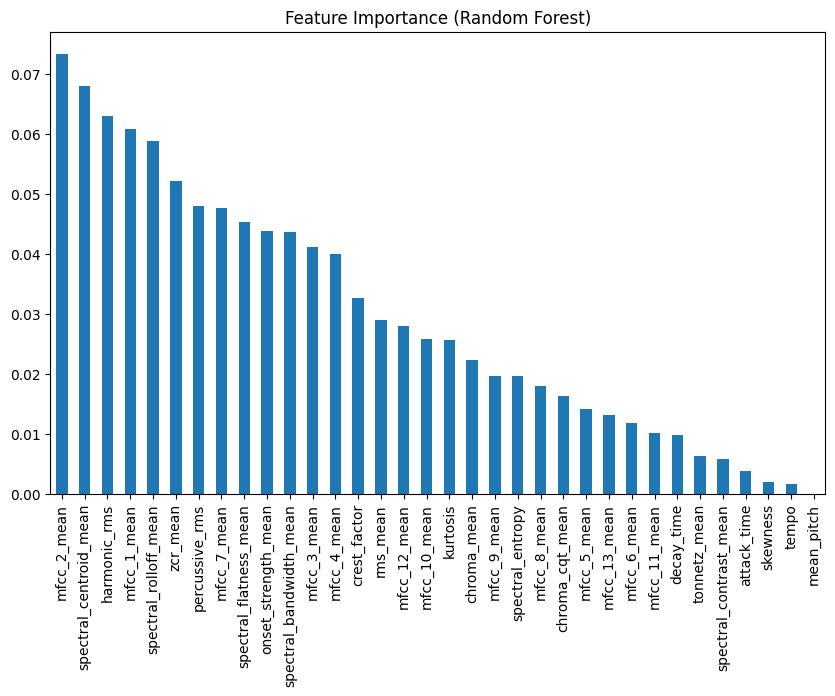

In [30]:
from sklearn.ensemble import RandomForestClassifier

features = ['zcr_mean', 'spectral_centroid_mean', 'spectral_rolloff_mean',
       'spectral_bandwidth_mean', 'rms_mean', 'mfcc_1_mean', 'mfcc_2_mean',
       'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean',
       'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_mean',
       'spectral_contrast_mean', 'tonnetz_mean', 'onset_strength_mean',
       'harmonic_rms', 'percussive_rms', 'mean_pitch', 'tempo',
       'chroma_cqt_mean', 'spectral_flatness_mean', 'spectral_entropy',
       'crest_factor', 'attack_time', 'decay_time', 'skewness', 'kurtosis']

label = ['audio_label']

rf = RandomForestClassifier(random_state=42)
rf.fit(df_features[features], df_features[label].values.ravel())
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance (Random Forest)")

print(importances.sort_values(ascending=False).keys())

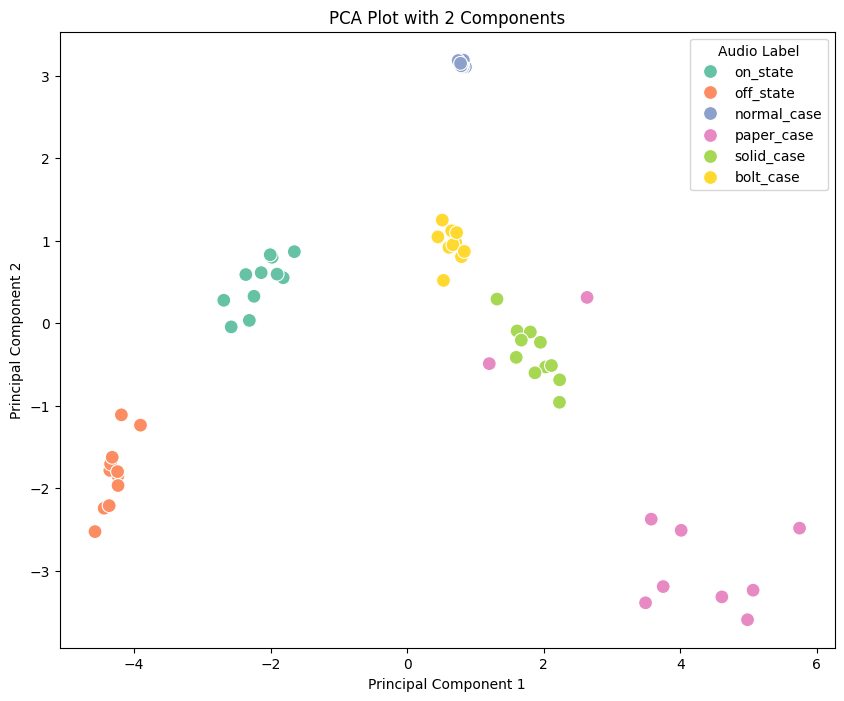

In [36]:
selected_features = ['mfcc_2_mean', 'spectral_centroid_mean', 'harmonic_rms', 'mfcc_1_mean',
       'spectral_rolloff_mean', 'zcr_mean', 'percussive_rms', 'mfcc_7_mean',
       'spectral_flatness_mean', 'onset_strength_mean',
       'spectral_bandwidth_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'audio_label']



def fill_missing_and_plot_pca(df, n_components=2):
    """
    Fill missing values for the given feature with the mean of the corresponding label group,
    perform PCA, and plot.

    Parameters:
        df (DataFrame): The input dataframe.
        feature (str): The feature for which missing values should be filled.
        n_components (int): Number of PCA components.
    """

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()



fill_missing_and_plot_pca(df_features[selected_features], n_components=2)
